In [1]:
import tensorflow as tf
print(tf.__version__)

gpus = tf.config.experimental.list_physical_devices(device_type='GPU')
tf.config.experimental.set_virtual_device_configuration(
    gpus[0],
    [tf.config.experimental.VirtualDeviceConfiguration(memory_limit=2048)]
)

2.3.1


# The Keras functional API

 ## Coding tutorials
 #### [1. Multiple inputs and outputs](#coding_tutorial_1)
 #### [2. Tensors and Variables](#coding_tutorial_2)
 #### [3. Accessing model layers](#coding_tutorial_3)
 #### [4. Freezing layers](#coding_tutorial_4)

***
<a id="coding_tutorial_1"></a>
## Multiple inputs and outputs

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

#### Load the acute inflammations dataset

The `acute inflammations` was created by a medical expert as a data set to test the expert system, which will perform the presumptive diagnosis of two diseases of the urinary system. You can find out more about the dataset [here](https://archive.ics.uci.edu/ml/datasets/Acute+Inflammations).

Attribute information:

Inputs:
- 体温 Temperature of patient : 35C-42C
- 恶心 Occurrence of nausea : yes/no
- 腰痛 Lumbar pain : yes/no
- 持续的排尿需求 Urine pushing (continuous need for urination) : yes/no
- 排尿痛 Micturition pains : yes/no
- 尿道出口肿胀 Burning of urethra, itch, swelling of urethra outlet : yes/no

Outputs:
- decision 1: 膀胱炎 Inflammation of urinary bladder : yes/no
- decision 2: 源自肾盂的肾炎 的Nephritis of renal pelvis origin : yes/no

#### Load the data

In [3]:
# Load the dataset

from sklearn.model_selection import train_test_split

pd_dat = pd.read_csv('data/diagnosis.csv')
dataset = pd_dat.values

pd_dat.describe()

0           1           2           3           4           5  \
count  120.000000  120.000000  120.000000  120.000000  120.000000  120.000000   
mean    38.724167    0.241667    0.583333    0.666667    0.491667    0.416667   
std      1.819132    0.429888    0.495074    0.473381    0.502027    0.495074   
min     35.500000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%     37.100000    0.000000    0.000000    0.000000    0.000000    0.000000   
50%     37.950000    0.000000    1.000000    1.000000    0.000000    0.000000   
75%     40.600000    0.000000    1.000000    1.000000    1.000000    1.000000   
max     41.500000    1.000000    1.000000    1.000000    1.000000    1.000000   

                6           7  
count  120.000000  120.000000  
mean     0.491667    0.416667  
std      0.502027    0.495074  
min      0.000000    0.000000  
25%      0.000000    0.000000  
50%      0.000000    0.000000  
75%      1.000000    1.000000  
max      1.000000    1.000000

上面数据中：
- 0-5： inputs数据
- 6-7： Outputs数据

In [4]:
pd_dat.head()

0  1  2  3  4  5  6  7
0  35.5  0  1  0  0  0  0  0
1  35.9  0  0  1  1  1  1  0
2  35.9  0  1  0  0  0  0  0
3  36.0  0  0  1  1  1  1  0
4  36.0  0  1  0  0  0  0  0

In [5]:
# Build train and test data splits

X_train, X_test, Y_train, Y_test = train_test_split(dataset[:,:6], dataset[:,6:], test_size=0.33)

print(X_train.shape, Y_train.shape)
print(X_test.shape, Y_test.shape)

(80, 6) (80, 2)
(40, 6) (40, 2)


In [6]:
# Assign training and testing inputs/outputs

temp_train, nocc_train, lumbp_train, up_train, mict_train, bis_train = np.transpose(X_train)
temp_test, nocc_test, lumbp_test, up_test, mict_test, bis_test = np.transpose(X_test)

inflam_train, nephr_train = Y_train[:, 0], Y_train[:, 1]
inflam_test, nephr_test = Y_test[:, 0], Y_test[:, 1]

print(temp_train.shape)
print(temp_test.shape)
print(inflam_train.shape, nephr_train.shape)

(80,)
(40,)
(80,) (80,)


#### Build the model

In [7]:
# Build the input layers

from tensorflow.keras import Input, layers

shape_inputs= (1,)
temperature = Input(shape=shape_inputs, name= 'temp')
nausea_occurence = Input(shape=shape_inputs, name= 'nocc')
lumbar_pain = Input(shape=shape_inputs, name= 'lumbp')
urine_pushing = Input(shape=shape_inputs, name= 'up')
micturition_pains = Input(shape=shape_inputs, name= 'mict')
bis = Input(shape=shape_inputs, name= 'bis')


In [8]:
# Create a list of all the inputs

list_inputs = [temperature, nausea_occurence, lumbar_pain, urine_pushing, 
               micturition_pains, bis]

In [9]:
# Merge all input features into a single large vector

x = layers.concatenate(list_inputs)


In [10]:
# Use a logistic regression classifier for disease prediction

inflammation_pred = layers.Dense(1, activation='sigmoid', name='inflam')(x)
nephritis_pred = layers.Dense(1, activation='sigmoid', name='nephr')(x)


In [11]:
# Create a list of all the outputsinflammation_pred

list_outputs = [inflammation_pred, nephritis_pred]

In [12]:
# Create the model object

model = tf.keras.Model(inputs=list_inputs, outputs=list_outputs)

#### Plot the model

In [13]:
# !pip install pydot pydotplus 
# !apt-get install -y graphviz

In [14]:
for layer in model.layers:
    print('-'*50)
    print(layer.input)
    print(layer.output)

--------------------------------------------------
Tensor("temp:0", shape=(None, 1), dtype=float32)
Tensor("temp:0", shape=(None, 1), dtype=float32)
--------------------------------------------------
Tensor("nocc:0", shape=(None, 1), dtype=float32)
Tensor("nocc:0", shape=(None, 1), dtype=float32)
--------------------------------------------------
Tensor("lumbp:0", shape=(None, 1), dtype=float32)
Tensor("lumbp:0", shape=(None, 1), dtype=float32)
--------------------------------------------------
Tensor("up:0", shape=(None, 1), dtype=float32)
Tensor("up:0", shape=(None, 1), dtype=float32)
--------------------------------------------------
Tensor("mict:0", shape=(None, 1), dtype=float32)
Tensor("mict:0", shape=(None, 1), dtype=float32)
--------------------------------------------------
Tensor("bis:0", shape=(None, 1), dtype=float32)
Tensor("bis:0", shape=(None, 1), dtype=float32)
--------------------------------------------------
[<tf.Tensor 'temp:0' shape=(None, 1) dtype=float32>, <tf.Te

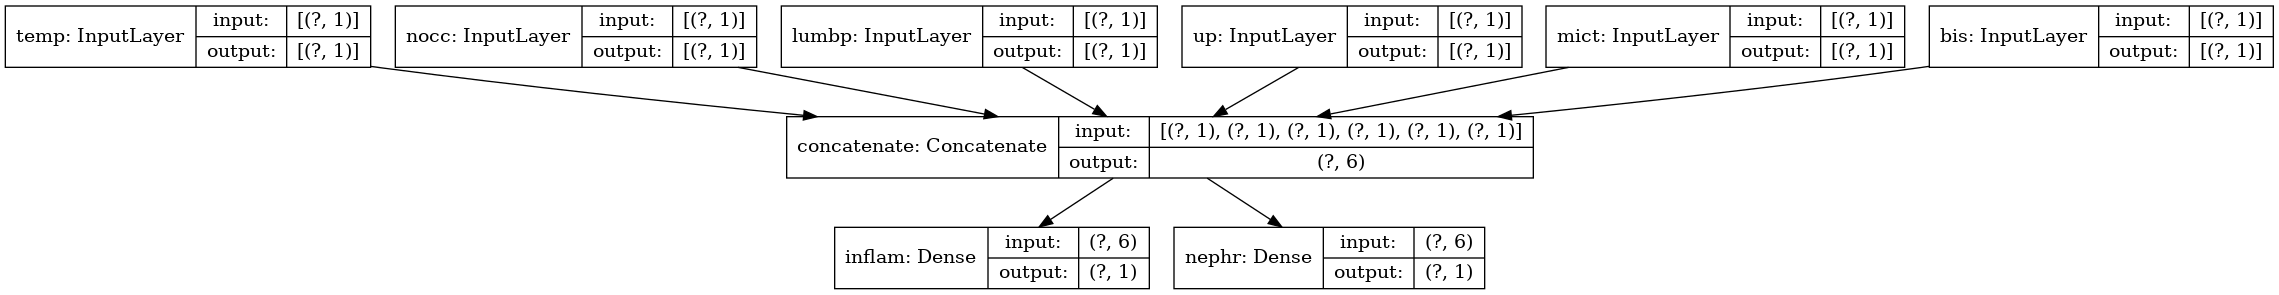

In [15]:
# Display the multiple input/output model

tf.keras.utils.plot_model(model, 'acute_inflammations.png', show_shapes=True)

#### Compile the model

In [16]:
# Compile the model

model.compile(optimizer = 'adam', 
              loss=['binary_crossentropy', 'binary_crossentropy'],
              metrics=[['acc'], ['acc']], 
              loss_weights = [1., 0.2]
             )


#### Fit the model 

In [17]:
# Define training inputs and outputs

inputs_train = {'temp': temp_train, 'nocc': nocc_train, 'lumbp': lumbp_train,
                'up': up_train, 'mict': mict_train, 'bis': bis_train}

outputs_train = {'inflam': inflam_train, 'nephr': nephr_train}

In [18]:
# Train the model

history = model.fit(inputs_train, outputs_train, epochs=1000, batch_size=128, verbose=False)

#### Plot the learning curves

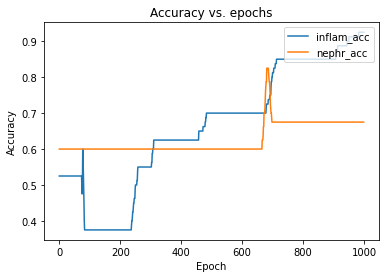

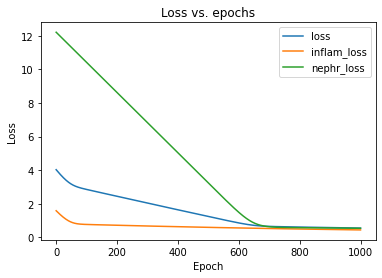

In [19]:
# Plot the training accuracy

acc_keys = [k for k in history.history.keys() if k in ('inflam_acc', 'nephr_acc')] 
loss_keys = [k for k in history.history.keys() if not k in acc_keys]

for k, v in history.history.items():
    if k in acc_keys:
        plt.figure(1)
        plt.plot(v)
    else:
        plt.figure(2)
        plt.plot(v)

plt.figure(1)
plt.title('Accuracy vs. epochs')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(acc_keys, loc='upper right')

plt.figure(2)
plt.title('Loss vs. epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loss_keys, loc='upper right')

plt.show()

In [20]:
# Evaluate the model

inputs_test = [temp_test, nocc_test, lumbp_test, up_test, mict_test, bis_test]
outputs_test = [inflam_test, nephr_test]

print(model.evaluate(inputs_train, outputs_train))
print(model.evaluate(inputs_test, outputs_test))

3/3 [==============================] - 0s 3ms/step - loss: 0.5566 - inflam_loss: 0.4477 - nephr_loss: 0.5445 - inflam_acc: 0.9250 - nephr_acc: 0.6750
[0.5565620064735413, 0.4476638734340668, 0.5444908142089844, 0.925000011920929, 0.675000011920929]
2/2 [==============================] - 0s 3ms/step - loss: 0.5749 - inflam_loss: 0.4751 - nephr_loss: 0.4990 - inflam_acc: 0.8750 - nephr_acc: 0.6500
[0.574877142906189, 0.4750821590423584, 0.49897488951683044, 0.875, 0.6499999761581421]


In [21]:
print(model.weights)
print('-'*50)
for weight in model.weights:
    print(weight.shape)

[<tf.Variable 'inflam/kernel:0' shape=(6, 1) dtype=float32, numpy=
array([[-0.02934415],
       [ 0.3528406 ],
       [-0.16283661],
       [ 1.4871284 ],
       [ 0.12064008],
       [-0.25834182]], dtype=float32)>, <tf.Variable 'inflam/bias:0' shape=(1,) dtype=float32, numpy=array([0.10843448], dtype=float32)>, <tf.Variable 'nephr/kernel:0' shape=(6, 1) dtype=float32, numpy=
array([[-0.07403813],
       [ 0.36045825],
       [ 0.70987654],
       [ 1.1888368 ],
       [-0.02769424],
       [ 1.4601102 ]], dtype=float32)>, <tf.Variable 'nephr/bias:0' shape=(1,) dtype=float32, numpy=array([0.6667393], dtype=float32)>]
--------------------------------------------------
(6, 1)
(1,)
(6, 1)
(1,)


***
<a id="coding_tutorial_2"></a>
## Tensors and Variables

In [22]:
import numpy as np

#### Create Variable objects

In [23]:
# Create Variable objects of different type with tf.Variable

strings = tf.Variable(["Hello world!"], tf.string)
floats  = tf.Variable([3.14159, 2.71828], tf.float64)
ints = tf.Variable([1, 2, 3], tf.int32)
complexs = tf.Variable([25.9 - 7.39j, 1.23 - 4.91j], tf.complex128)

In [24]:
# Initialise a Variable value

tf.Variable(tf.constant(4.2, shape=(3,3)))


<tf.Variable 'Variable:0' shape=(3, 3) dtype=float32, numpy=
array([[4.2, 4.2, 4.2],
       [4.2, 4.2, 4.2],
       [4.2, 4.2, 4.2]], dtype=float32)>

#### Use and modify Variable values

In [25]:
# Use the value of a Variable

v = tf.Variable(0.0)
w = v + 1  # w is a tf.Tensor which is computed based on the value of v.

print(type(w))

<class 'tensorflow.python.framework.ops.EagerTensor'>


In [26]:
# Increment the value of a Variable

v.assign_add(1)
print(v)

<tf.Variable 'Variable:0' shape=() dtype=float32, numpy=1.0>


In [27]:
# Decrement the value of a Variable

v.assign_sub(1)
print(v)

<tf.Variable 'Variable:0' shape=() dtype=float32, numpy=0.0>


#### Create Tensor objects

Create a constant tensor and print its type as well as its shape:

In [28]:
# Create a constant Tensor

x = tf.constant([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
print(x)
print("dtype:", x.dtype)
print("shape:", x.shape)

tf.Tensor(
[[1 2 3]
 [4 5 6]
 [7 8 9]], shape=(3, 3), dtype=int32)
dtype: <dtype: 'int32'>
shape: (3, 3)


In [29]:
# Obtain the value as a numpy array

x.numpy()

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]], dtype=int32)

In [30]:
# Create a Tensor of type float32

x = tf.constant([[1, 2, 3], [4, 5, 6], [7, 8, 9]], dtype=tf.float32)
print("dtype:", x.dtype)

dtype: <dtype: 'float32'>


In [31]:
# Create coefficients

coeffs = np.arange(16)

In [32]:
# Initialise shapes

shape1 = [8, 2]
shape2 = [4, 4]
shape3 = [2, 2, 2, 2]


In [33]:
# Create Tensors of different shape

a = tf.constant(coeffs, shape=shape1)
print("\n a:\n ", a)

b = tf.constant(coeffs, shape=shape2)
print("\n b:\n ", b)

c = tf.constant(coeffs, shape=shape3)
print("\n c:\n ", c)


 a:
  tf.Tensor(
[[ 0  1]
 [ 2  3]
 [ 4  5]
 [ 6  7]
 [ 8  9]
 [10 11]
 [12 13]
 [14 15]], shape=(8, 2), dtype=int64)

 b:
  tf.Tensor(
[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]
 [12 13 14 15]], shape=(4, 4), dtype=int64)

 c:
  tf.Tensor(
[[[[ 0  1]
   [ 2  3]]

  [[ 4  5]
   [ 6  7]]]


 [[[ 8  9]
   [10 11]]

  [[12 13]
   [14 15]]]], shape=(2, 2, 2, 2), dtype=int64)


#### Useful Tensor operations

In [34]:
# Create a constant Tensor

t = tf.constant(np.arange(80), shape=[5,2,8])
print(t)

tf.Tensor(
[[[ 0  1  2  3  4  5  6  7]
  [ 8  9 10 11 12 13 14 15]]

 [[16 17 18 19 20 21 22 23]
  [24 25 26 27 28 29 30 31]]

 [[32 33 34 35 36 37 38 39]
  [40 41 42 43 44 45 46 47]]

 [[48 49 50 51 52 53 54 55]
  [56 57 58 59 60 61 62 63]]

 [[64 65 66 67 68 69 70 71]
  [72 73 74 75 76 77 78 79]]], shape=(5, 2, 8), dtype=int64)


In [35]:
# Get the rank of a Tensor

rank  = tf.rank(t)

In [36]:
# Display the rank

print("rank: ", rank)

rank:  tf.Tensor(3, shape=(), dtype=int32)


In [37]:
# Reshape a Tensor

t2 = tf.reshape(t, [8, 10])

In [38]:
# Display the new shape

print("t2.shape: ", t2.shape)

t2.shape:  (8, 10)


In [39]:
# Create ones, zeros, identity and constant Tensors

ones = tf.ones(shape=(2, 3))
zeros = tf.zeros(shape=(2, 4))
eye = tf.eye(4)
tensor7 = tf.constant(7.0, shape=[2, 2])

In [40]:
# Display the created tensors

print("\n Ones:\n ", ones)
print("\n Zeros:\n ", zeros)
print("\n Identity:\n ", eye)
print("\n Tensor filled with 7: ", tensor7)


 Ones:
  tf.Tensor(
[[1. 1. 1.]
 [1. 1. 1.]], shape=(2, 3), dtype=float32)

 Zeros:
  tf.Tensor(
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]], shape=(2, 4), dtype=float32)

 Identity:
  tf.Tensor(
[[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]], shape=(4, 4), dtype=float32)

 Tensor filled with 7:  tf.Tensor(
[[7. 7.]
 [7. 7.]], shape=(2, 2), dtype=float32)


In [41]:
# Create a ones Tensor and a zeros Tensor

t1 = tf.ones(shape=(2, 2))
t2 = tf.zeros(shape=(2, 2))

In [42]:
# Concatentate two Tensors

concat0 = tf.concat([t1, t2], 0)
concat1 = tf.concat([t1, t2], 1)

In [43]:
# Display the concatenated tensors

print(concat0)
print(concat1)

tf.Tensor(
[[1. 1.]
 [1. 1.]
 [0. 0.]
 [0. 0.]], shape=(4, 2), dtype=float32)
tf.Tensor(
[[1. 1. 0. 0.]
 [1. 1. 0. 0.]], shape=(2, 4), dtype=float32)


In [44]:
# Create a constant Tensor

t = tf.constant(np.arange(24), shape=(3, 2, 4))
print("\n t shape: ", t.shape)


 t shape:  (3, 2, 4)


In [45]:
# Expanding the rank of Tensors

t1 = tf.expand_dims(t, 0)
t2 = tf.expand_dims(t, 1)
t3 = tf.expand_dims(t, 3)
t4 = tf.expand_dims(t, -1)
t5 = tf.expand_dims(tf.expand_dims(t, -1), 2)

In [46]:
# Display the shapes after tf.expand_dims
print("t shape: ", t.shape)
print("\nAfter expanding dims:\n t1 shape: ", t1.shape, "\n t2 shape: ", t2.shape, "\n t3 shape: ", t3.shape)
print(" t4 shape: ", t4.shape)
print(" t5 shape: ", t5.shape)

t shape:  (3, 2, 4)

After expanding dims:
 t1 shape:  (1, 3, 2, 4) 
 t2 shape:  (3, 1, 2, 4) 
 t3 shape:  (3, 2, 4, 1)
 t4 shape:  (3, 2, 4, 1)
 t5 shape:  (3, 2, 1, 4, 1)


In [47]:
# Squeezing redundant dimensions

t1 = tf.squeeze(t1, 0)
t2 = tf.squeeze(t2, 1)
t3 = tf.squeeze(t3, 3)
t4 = tf.squeeze(t4, -1)
t5 = tf.squeeze(t5)
t6 = tf.squeeze( tf.expand_dims(tf.expand_dims(t, -1), 2), 2)

In [48]:
# Display the shapes after tf.squeeze

print("\n After squeezing:\n t1 shape: ", t1.shape, "\n t2 shape: ", t2.shape, "\n t3 shape: ", t3.shape)
print(" t4 shape: ", t4.shape, "\n t5 shape: ", t5.shape, "\n t6 shape: ", t6.shape)


 After squeezing:
 t1 shape:  (3, 2, 4) 
 t2 shape:  (3, 2, 4) 
 t3 shape:  (3, 2, 4)
 t4 shape:  (3, 2, 4) 
 t5 shape:  (3, 2, 4) 
 t6 shape:  (3, 2, 4, 1)


In [49]:
# Slicing a Tensor

x = tf.constant([1, 2, 3, 4, 5, 6, 7])
print(x[1:4])

tf.Tensor([2 3 4], shape=(3,), dtype=int32)


#### Doing maths with Tensors

In [50]:
# Create two constant Tensors

c = tf.constant([[1.0, 2.0], [3.0, 4.0]])
d = tf.constant([[1.0, 1.0], [0.0, 1.0]])

In [51]:
# Matrix multiplication

matmul_cd = c @ d
matmul_cd1 = tf.matmul(c, d)

In [52]:
# Display the result

print("\n c @ d:\n", matmul_cd)
print("\n tf.matmul1(c,d):\n", matmul_cd1)


 c @ d:
 tf.Tensor(
[[1. 3.]
 [3. 7.]], shape=(2, 2), dtype=float32)

 tf.matmul1(c,d):
 tf.Tensor(
[[1. 3.]
 [3. 7.]], shape=(2, 2), dtype=float32)


In [53]:
# Elementwise operations

c_times_d = c*d
c_plus_d = c+d
c_minus_d = c-d
c_div_c = c/c

In [54]:
# Display the results

print("\n c*d:\n", c_times_d)
print("\n c+d:\n", c_plus_d)
print("\n c-d:\n", c_minus_d)
print("\n c/c:\n", c_div_c)


 c*d:
 tf.Tensor(
[[1. 2.]
 [0. 4.]], shape=(2, 2), dtype=float32)

 c+d:
 tf.Tensor(
[[2. 3.]
 [3. 5.]], shape=(2, 2), dtype=float32)

 c-d:
 tf.Tensor(
[[0. 1.]
 [3. 3.]], shape=(2, 2), dtype=float32)

 c/c:
 tf.Tensor(
[[1. 1.]
 [1. 1.]], shape=(2, 2), dtype=float32)


In [55]:
# Create Tensors

a = tf.constant([[2, 3], [3, 3]])
b = tf.constant([[8, 7], [2, 3]])
x = tf.constant([[-6.89 + 1.78j], [-2.54 + 2.15j]])

In [56]:
# Absolute value of a Tensor

absx = tf.abs(x)

In [57]:
# Power of a Tensor

powab = tf.pow(a, b)

In [58]:
# Display the results

print("\n ", absx)
print("\n ", powab)


  tf.Tensor(
[[7.11621388]
 [3.32777704]], shape=(2, 1), dtype=float64)

  tf.Tensor(
[[ 256 2187]
 [   9   27]], shape=(2, 2), dtype=int32)


#### Randomly sampled constant tensors

In [59]:
# Create a Tensor with samples from a Normal distribution
tn = tf.random.normal(shape=(2,2), mean=0, stddev=1.)
print(tn)

tf.Tensor(
[[ 1.1206487   1.4653271 ]
 [-0.07532506 -0.91958565]], shape=(2, 2), dtype=float32)


In [60]:
# Create a Tensor with samples from a Uniform distribution

tu = tf.random.uniform(shape=(2,1), minval=0, maxval=10, dtype='int32')
print(tu)

tf.Tensor(
[[5]
 [4]], shape=(2, 1), dtype=int32)


In [61]:
# Create a Tensor with samples from a Poisson distribution

tp = tf.random.poisson((2,2), 5)
print(tp)

tf.Tensor(
[[7. 3.]
 [6. 4.]], shape=(2, 2), dtype=float32)


In [62]:
# More maths operations

d = tf.square(tn)
e = tf.exp(d)
f = tf.cos(c)

print(d)
print(e)
print(f)

tf.Tensor(
[[1.2558537  2.1471837 ]
 [0.00567387 0.84563774]], shape=(2, 2), dtype=float32)
tf.Tensor(
[[3.5108342 8.560714 ]
 [1.0056901 2.329463 ]], shape=(2, 2), dtype=float32)
tf.Tensor(
[[ 0.5403023 -0.4161468]
 [-0.9899925 -0.6536436]], shape=(2, 2), dtype=float32)


***
<a id="coding_tutorial_3"></a>
## Accessing model layers

In [63]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

#### Load the pre-trained model

In this section, we aim to demonstrate accessing layer attributes within a model.

Let's get started by loading the `VGG19` pre-trained model from the `keras.applications` library, which is a very deep network trained on more than a million images from the ImageNet database. The network is trained to classify images into 1000 object categories.

需要注意的是vgg16需要分配2G的GPU内存。

In [64]:
# Load the VGG19 model

from tensorflow.keras.applications import VGG19
vgg_model = VGG19()
vgg_model.summary()
# from tensorflow.keras.models import load_model
# vgg_model = load_model('models/Vgg19.h5')

In [65]:
# Get the inputs, layers and display the summary

vgg_input = vgg_model.input
vgg_layers = vgg_model.layers
vgg_model.summary()

Model: "vgg19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

#### Build a model to access the layer outputs

In [66]:
from tensorflow.keras.models import Model

In [67]:
# Build a model that returns the layer outputs
layer_outs = [layer.output for layer in vgg_layers]
features = Model(inputs=vgg_input, outputs=layer_outs)


In [68]:
features.summary()

Model: "functional_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)      

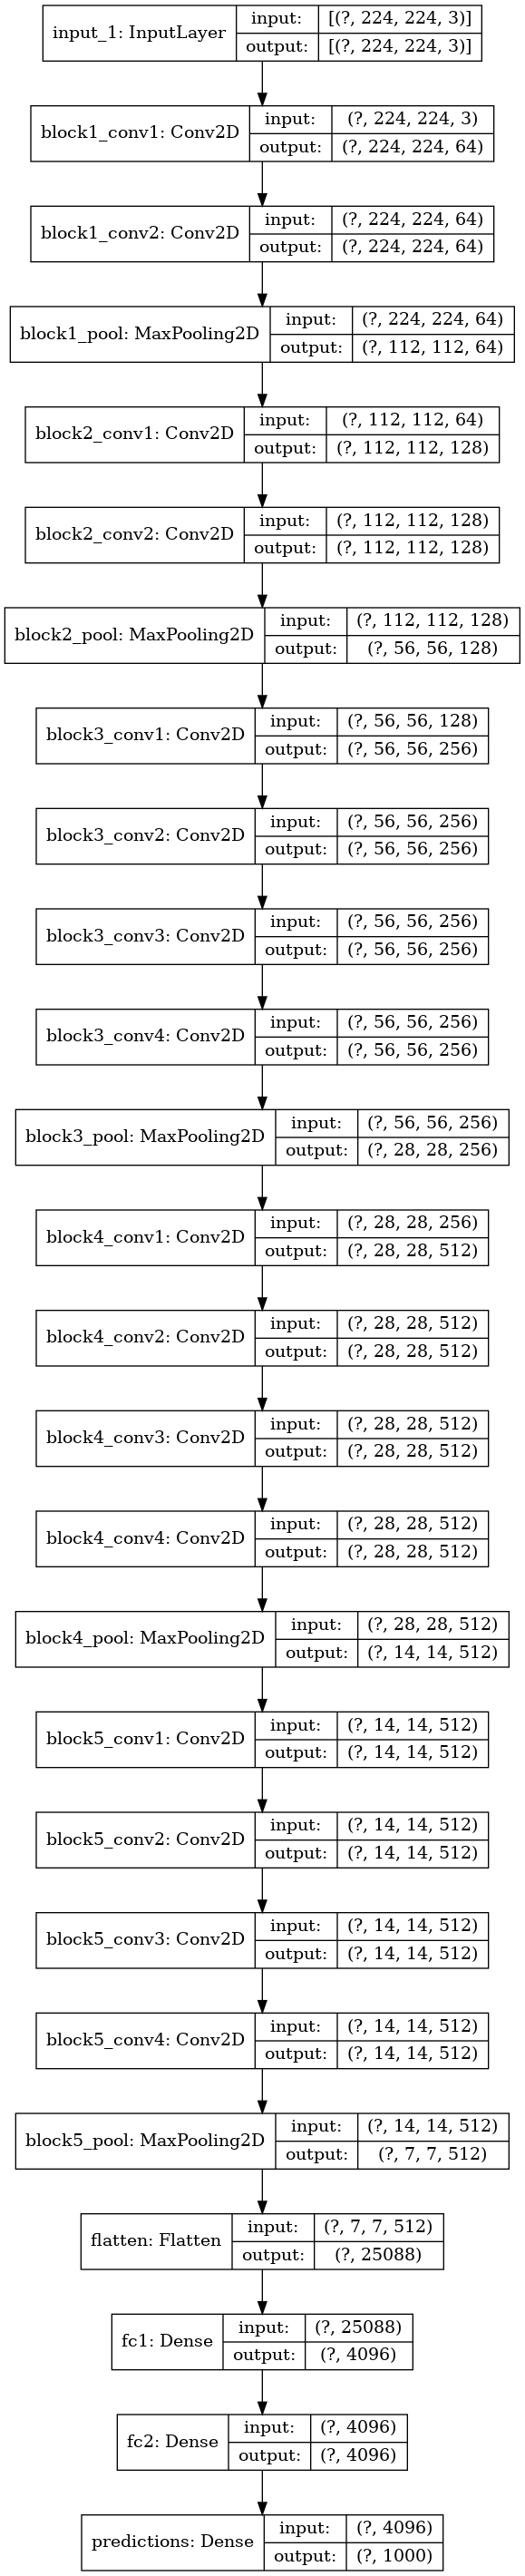

In [68]:
# Plot the model
tf.keras.utils.plot_model(features, 'vgg19_model.png', show_shapes=True)


<class 'tensorflow.python.framework.ops.EagerTensor'> (1, 224, 224, 3)
<class 'tensorflow.python.framework.ops.EagerTensor'> (1, 224, 224, 64)
<class 'tensorflow.python.framework.ops.EagerTensor'> (1, 224, 224, 64)
<class 'tensorflow.python.framework.ops.EagerTensor'> (1, 112, 112, 64)
<class 'tensorflow.python.framework.ops.EagerTensor'> (1, 112, 112, 128)
<class 'tensorflow.python.framework.ops.EagerTensor'> (1, 112, 112, 128)
<class 'tensorflow.python.framework.ops.EagerTensor'> (1, 56, 56, 128)
<class 'tensorflow.python.framework.ops.EagerTensor'> (1, 56, 56, 256)
<class 'tensorflow.python.framework.ops.EagerTensor'> (1, 56, 56, 256)
<class 'tensorflow.python.framework.ops.EagerTensor'> (1, 56, 56, 256)
<class 'tensorflow.python.framework.ops.EagerTensor'> (1, 56, 56, 256)
<class 'tensorflow.python.framework.ops.EagerTensor'> (1, 28, 28, 256)
<class 'tensorflow.python.framework.ops.EagerTensor'> (1, 28, 28, 512)
<class 'tensorflow.python.framework.ops.EagerTensor'> (1, 28, 28, 512)

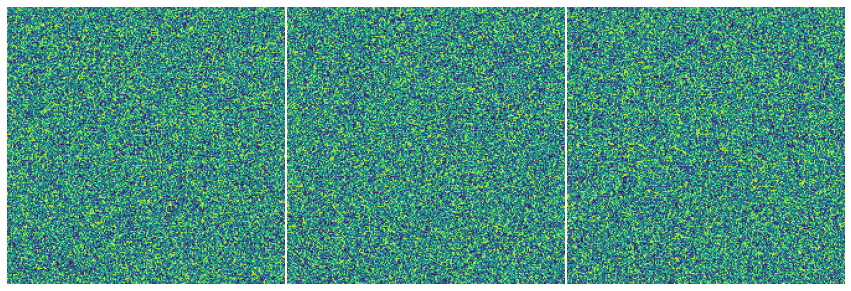

In [69]:
# Test the model on a random input

img = np.random.random((1, 224, 224, 3)).astype('float32')
extracted_features = features(img)
for feature in extracted_features:
    print(type(feature), feature.shape)
    
# Visualise the input channels

f1 = extracted_features[0]
print('\n f1.shape: ', f1.shape)

imgs = f1[0,:,:]
plt.figure(figsize=(15,15))
for n in range(3):
    plt.subplot(1, 3, n+1)
    plt.imshow(imgs[:,:,n])
    plt.axis('off')
    
plt.subplots_adjust(wspace=0.01, hspace=0.01)      

#### Load the 'cool cat' picture

In Zambia’s South Luangwa National Park, a photographer had been watching a pride of lions while they slept off a feast from a buffalo kill. When this female walked away, he anticipated that she might be going for a drink and so he positioned his vehicle on the opposite side of the waterhole. The `cool cat` picture is one of the highly commended 2018 Image from Wildlife Photographer of the Year.

(681, 968, 3)


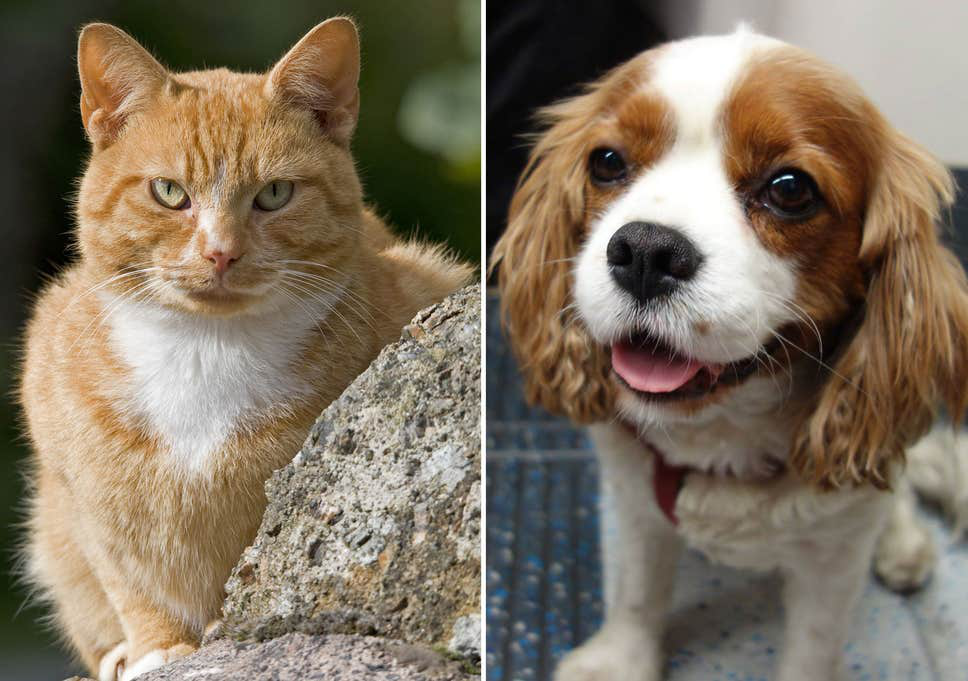

In [112]:
# Display the original image

import IPython.display as display
from PIL import Image

img_path = 'data/cool_cat.jpg'
img_path = 'data/Cats-Dogs-Rex.jpg'

img = Image.open(img_path)
print(image.img_to_array(img).shape)
display.display(img)

#### Visualise network features from the input image

In [113]:
# Preprocess the image

from tensorflow.keras.applications.vgg19 import preprocess_input
from tensorflow.keras.preprocessing import image


img = image.load_img(img_path, target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
print(x.shape)
print(x[0,0,0])
x = preprocess_input(x)
print(x.shape)
print(x[0,0,0])

(1, 224, 224, 3)
[30. 40. 16.]
(1, 224, 224, 3)
[-87.939 -76.779 -93.68 ]


In [114]:
# Extract the features

extracted_features = features(x)


 feature.shape:  (1, 224, 224, 3)


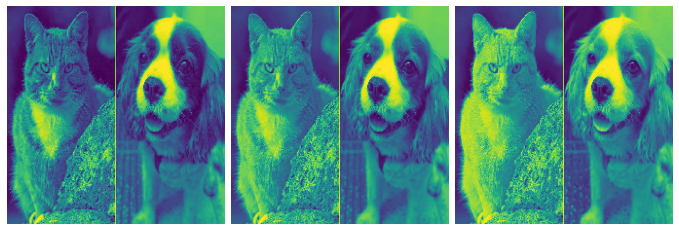

In [115]:
# Visualise the input channels

def show_feature(feature):
    print('\n feature.shape: ', feature.shape)

    imgs = feature[0,:,:]
    channels = min(imgs.shape[-1], 16)
    rows = int((channels-1)/4)+1

    plt.figure(figsize=(16,4*rows))    
    for channel in range(channels):
        plt.subplot(rows, 4, channel+1)
        plt.imshow(imgs[:,:,channel])
        plt.axis('off')

    plt.subplots_adjust(wspace=0.01, hspace=0.01)    
    
show_feature(extracted_features[0])


 feature.shape:  (1, 224, 224, 64)


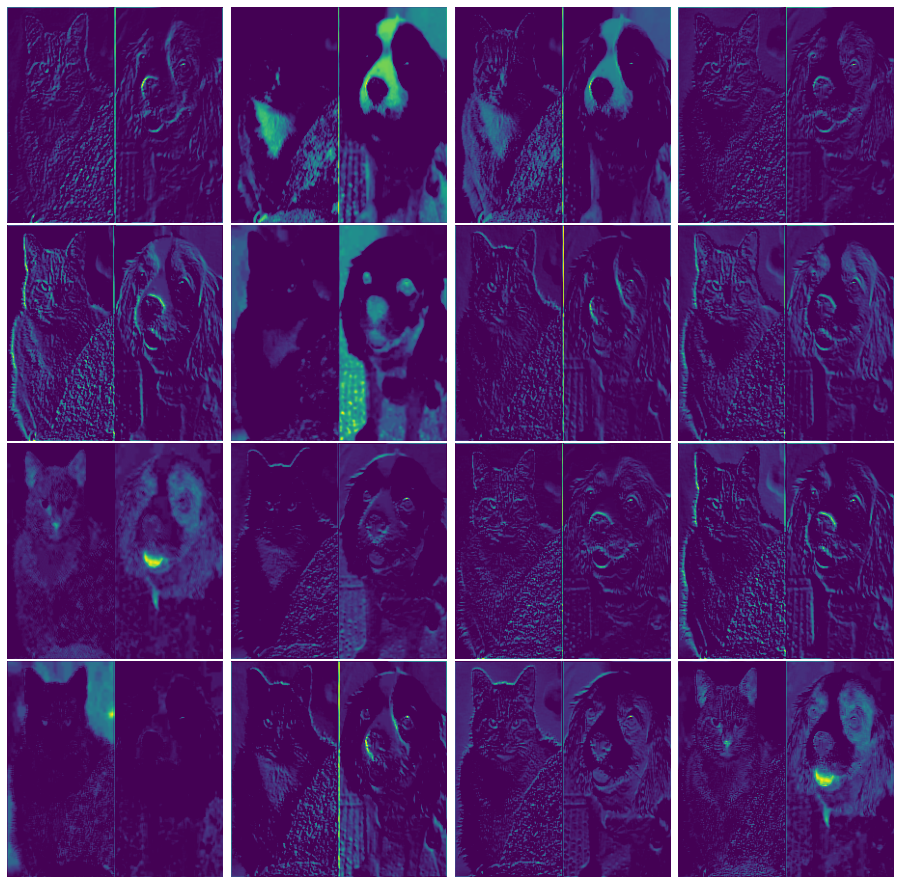

In [116]:
# Visualise some features in the first hidden layer
    
show_feature(extracted_features[1])

In [119]:
# Build a model to extract features by layer name

extracted_features_block1_pool = Model(inputs=features.input, outputs=features.get_layer('block1_pool').output)
block1_pool_features = extracted_features_block1_pool.predict(x)  # 返回numpy.ndarray
# block1_pool_features = extracted_features_block1_pool(x)  # 返回tensor。 下面一行代码可以到相同结果


 feature.shape:  (1, 112, 112, 64)


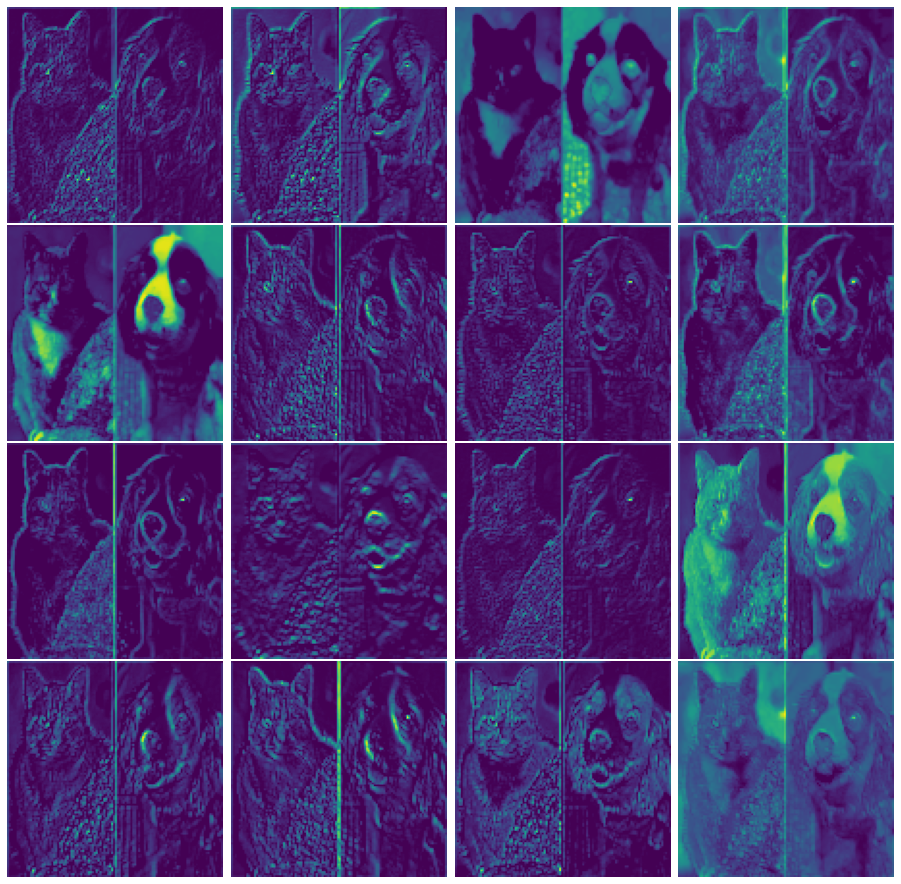

In [120]:
# Visualise some features from the extracted layer output

show_feature(block1_pool_features)


 feature.shape:  (1, 112, 112, 64)


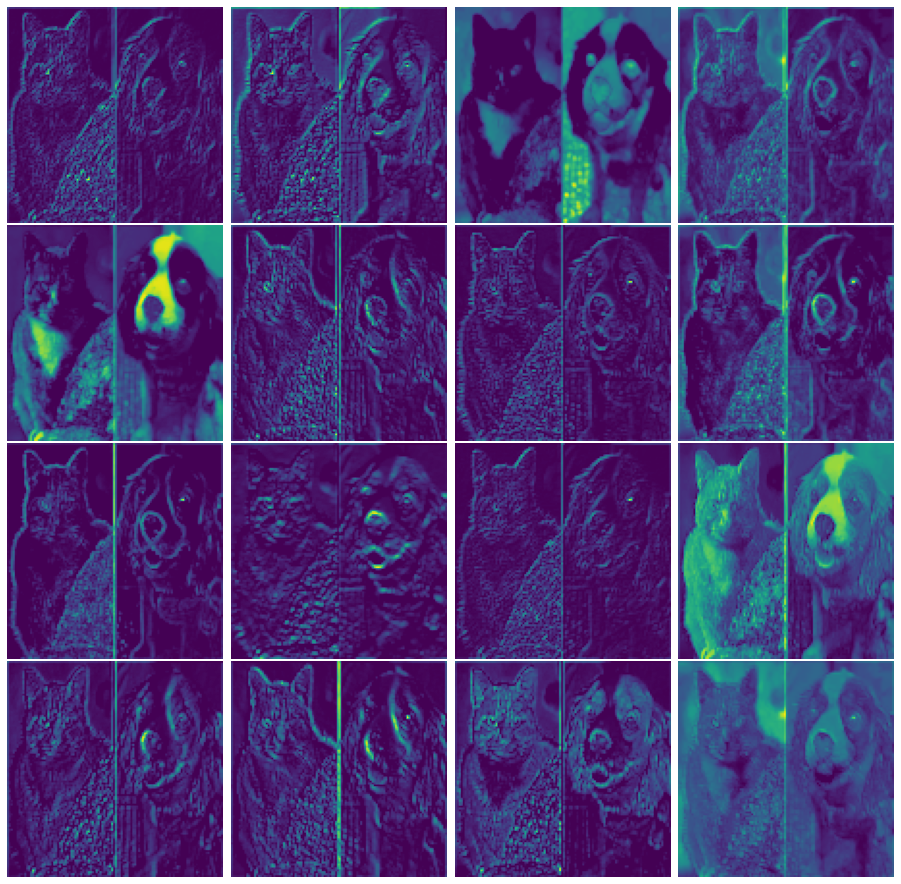

In [121]:
show_feature(extracted_features_block1_pool(x))

In [122]:
# Extract features from a layer deeper in the network
extracted_features_block5_conv4 = Model(inputs=features.input, outputs=features.get_layer('block5_conv4').output)
block5_conv4_features = extracted_features_block5_conv4.predict(x)




 feature.shape:  (1, 14, 14, 512)


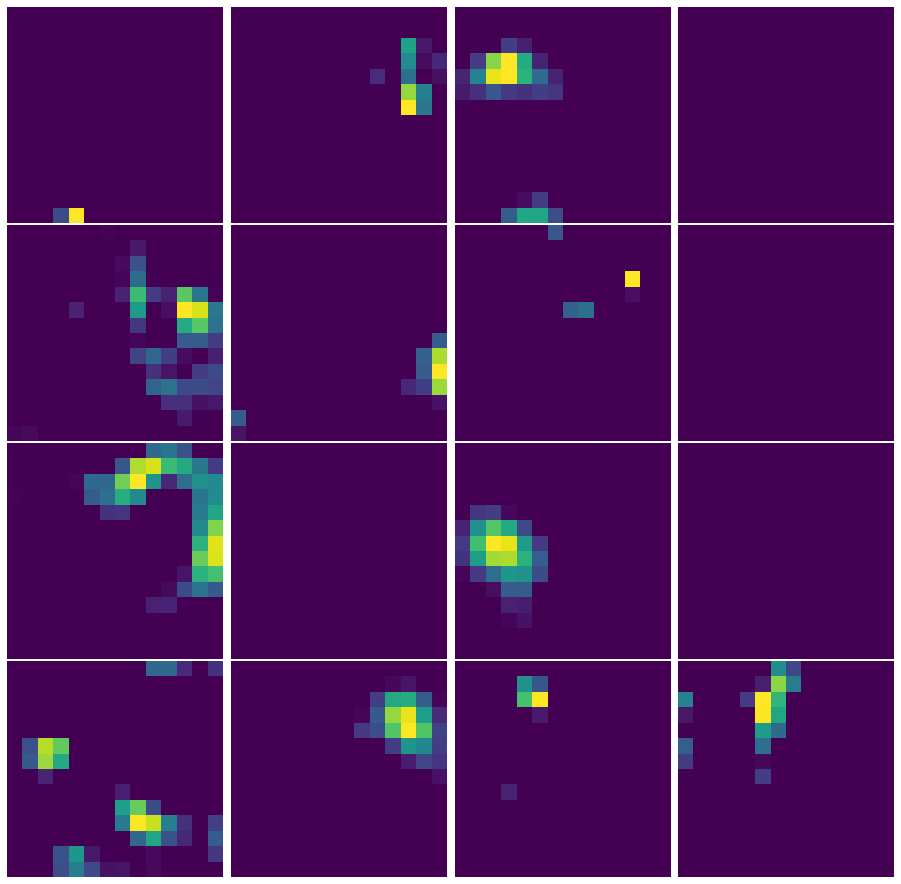

In [123]:
# Visualise some features from the extracted layer output

show_feature(block5_conv4_features)

***
<a id="coding_tutorial_4"></a>
## Freezing layers

In [80]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

#### Build the model

In [81]:
# Build a small Sequential model

from tensorflow.keras.models import Sequential
from tensorflow.keras import layers

model = Sequential([
    layers.Dense(4, input_shape=(4,), activation='relu', kernel_initializer='random_uniform',
                 bias_initializer='ones'),
    layers.Dense(2, activation='relu', kernel_initializer='lecun_normal', bias_initializer='ones'),
    layers.Dense(4, activation='softmax'),
])

In [82]:
# Display the model summary

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 4)                 20        
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 10        
_________________________________________________________________
dense_2 (Dense)              (None, 4)                 12        
Total params: 42
Trainable params: 42
Non-trainable params: 0
_________________________________________________________________


#### Examine the weight matrix variation over training

In [83]:
# Retrieve the weights and biases
def get_weights_bias(model):
    return [e.weights[0].numpy() for e in model.layers],[e.bias.numpy() for e in model.layers]

W0_layers, b0_layers  = get_weights_bias(model)


In [84]:
# Construct a synthetic dataset

x_train = np.random.random((100, 4))
y_train = x_train

x_test = np.random.random((20, 4))
y_test = x_test

In [85]:
# Compile and fit the model

model.compile(optimizer='adam',
              loss='mse',
              metrics=['acc'])

model.fit(x_train, y_train, epochs=50, verbose=False);

In [86]:
# Retrieve weights and biases

W1_layers, b1_layers = get_weights_bias(model)

Layer 0: bias variation:  0.0
Layer 1: bias variation:  0.0
Layer 2: bias variation:  0.076937445


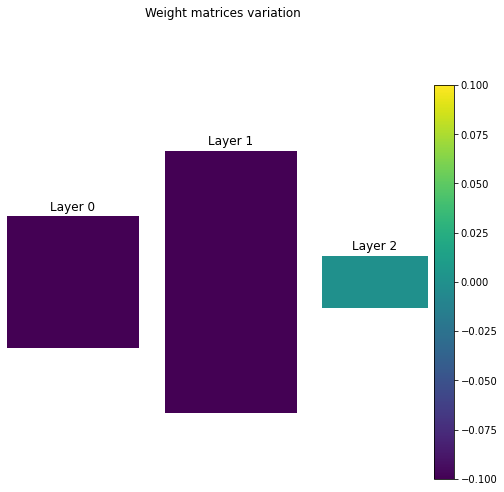

In [87]:
# Plot the variation

def plot_weight_variation(W0_layers, b0_layers, W1_layers, b1_layers):
    plt.figure(figsize=(8,8))
    for n in range(3):
        delta_l = W1_layers[n] - W0_layers[n]
        print('Layer '+str(n)+': bias variation: ', np.linalg.norm(b1_layers[n] - b0_layers[n]))
        ax = plt.subplot(1,3,n+1)
        plt.imshow(delta_l)
        plt.title('Layer '+str(n))
        plt.axis('off')
    plt.colorbar()
    plt.suptitle('Weight matrices variation')
    
plot_weight_variation(W0_layers, b0_layers, W1_layers, b1_layers)

#### Freeze layers at build time

In [88]:
# Count the trainable and non trainable variables before the freezing

n_trainable_variables = len(model.trainable_variables)
n_non_trainable_variables = len(model.non_trainable_variables)


In [89]:
# Display the number of trainable and non trainable variables before the freezing

print("\n Before freezing:\n\t Number of trainable variables: ", n_trainable_variables,
                         "\n\t Number of non trainable variables: ", n_non_trainable_variables)


 Before freezing:
	 Number of trainable variables:  6 
	 Number of non trainable variables:  0


In [90]:
# Build the model

model = Sequential([
    layers.Dense(4, input_shape=(4,), activation='relu', kernel_initializer='random_uniform',
                 bias_initializer='ones', trainable= False),
    layers.Dense(2, activation='relu', kernel_initializer='lecun_normal', bias_initializer='ones'),
    layers.Dense(4, activation='softmax'),
])

In [91]:
# Count the trainable and non trainable variables after the freezing
n_trainable_variables = len(model.trainable_variables)
n_non_trainable_variables = len(model.non_trainable_variables)


In [92]:
# Display the number of trainable and non trainable variables after the freezing

print("\n After freezing:\n\t Number of trainable variables: ", n_trainable_variables,
                         "\n\t Number of non trainable variables: ", n_non_trainable_variables)


 After freezing:
	 Number of trainable variables:  4 
	 Number of non trainable variables:  2


In [93]:
# Retrieve weights and biases

W0_layers, b0_layers  = get_weights_bias(model)

In [94]:
# Compile and fit the model

model.compile(optimizer='adam',
              loss='mse',
              metrics=['acc'])

model.fit(x_train, y_train, epochs=50, verbose=False);

In [95]:
# Retrieve weights and biases

W1_layers, b1_layers = get_weights_bias(model)

Layer 0: bias variation:  0.0
Layer 1: bias variation:  0.29969138
Layer 2: bias variation:  0.4807195


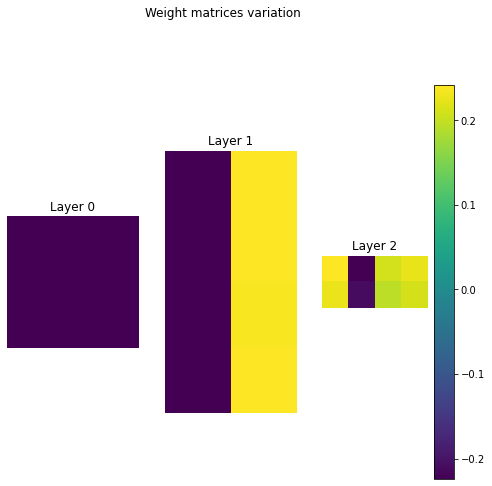

In [96]:
# Plot the variation

plot_weight_variation(W0_layers, b0_layers, W1_layers, b1_layers)

#### Freeze layers of a pre-built model

In [97]:
# Count the trainable and non trainable variables before the freezing

print("\n Before freezing:\n\t Number of trainable variables: ", len(model.trainable_variables),
                         "\n\t Number of non trainable variables: ", len(model.non_trainable_variables))


 Before freezing:
	 Number of trainable variables:  4 
	 Number of non trainable variables:  2


In [98]:
# Freeze the second layer
model.layers[1].trainable = False


In [99]:
# Count the trainable and non trainable variables after the freezing

print("\n After freezing:\n\t Number of trainable variables: ", len(model.trainable_variables),
                        "\n\t Number of non trainable variables: ", len(model.non_trainable_variables))


 After freezing:
	 Number of trainable variables:  2 
	 Number of non trainable variables:  4


In [100]:
# Compile and fit the model

model.compile(optimizer='adam',
              loss='mse',
              metrics=['acc'])

model.fit(x_train, y_train, epochs=50, verbose=False);

In [101]:
# Retrieve weights and biases

W2_layers, b2_layers = get_weights_bias(model)

Layer 0: bias variation:  0.0
Layer 1: bias variation:  0.0
Layer 2: bias variation:  0.0


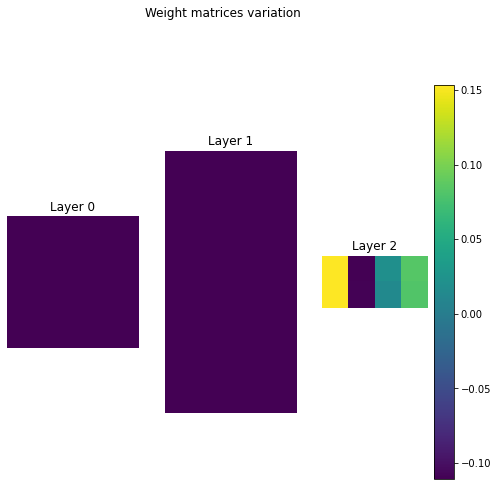

In [103]:
# Plot the variation

plot_weight_variation(W1_layers, b1_layers, W2_layers, b1_layers)